In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from scipy import stats

plt.style.use('ggplot')
%matplotlib inline

In [42]:
beh_path = "/home/kmb/Desktop/Neuroscience/Projects/BONNA_decide_net/" \
           "data/main_fmri_study/behavioral/behavioral_data_clean_all.npy"
beh_meta_path = beh_path.replace('npy', 'json')

# Load behavioral data
beh = np.load(beh_path)
with open(beh_meta_path, 'r') as f:
    meta = json.loads(f.read())

print("Shape of beh array:", beh.shape)
print("Conditions", [(i, cond)for i, cond in enumerate(meta['dim2'])])
print("Columns:", [(i, col) for i, col in enumerate(meta['dim4'])])

n_subjects = beh.shape[0]
n_conditions = 2

Shape of beh array: (32, 2, 110, 21)
Conditions [(0, 'rew'), (1, 'pun')]
Columns: [(0, 'block'), (1, 'rwd'), (2, 'magn_left'), (3, 'magn_right'), (4, 'response'), (5, 'rt'), (6, 'won_bool'), (7, 'won_magn'), (8, 'acc_after_trial'), (9, 'onset_iti'), (10, 'onset_iti_plan'), (11, 'onset_iti_glob'), (12, 'onset_dec'), (13, 'onset_dec_plan'), (14, 'onset_dec_glob'), (15, 'onset_isi'), (16, 'onset_isi_plan'), (17, 'onset_isi_glob'), (18, 'onset_out'), (19, 'onset_out_plan'), (20, 'onset_out_glob')]


In [52]:
# Number of reversals for each participant
def calculate_reversals(response):
    """Calculate number of side switches in subject responses."""
    return len(np.nonzero(np.diff(response[np.nonzero(response)]))[0])

reversals = np.zeros((n_subjects, n_conditions))

for i in range(n_subjects):
    for j in range(n_conditions):
        reversals[i, j] = calculate_reversals(beh[i, j, :, 4])


stats.ttest_rel(reversals[:, 0], reversals[:, 1])

Ttest_relResult(statistic=0.07794626295864657, pvalue=0.9383717474097866)

r=0.0124 
p-value=0.304


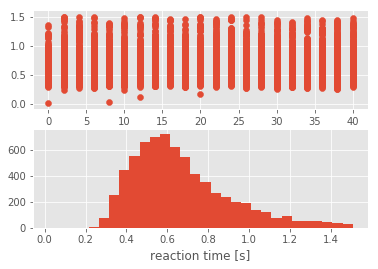

In [127]:
# Test potential relationship between reaction time and difference in reward
# magnitude (for single subject or all subjects)
subject = list(range(n_subjects))

# Difference in magnitude
magdiff = np.abs(beh[subject, :, :, 2]-beh[subject, :, :, 3]).flatten()
rt = beh[subject, :, :, 5].flatten()

indices = ~np.isnan(rt)
magdiff = magdiff[indices]
rt = rt[indices]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,facecolor='w')
ax1.scatter(magdiff, rt);
ax2.hist(rt, bins=30);
ax2.set_xlabel("reaction time [s]")

r, pval = stats.pearsonr(magdiff, rt)
print(f'r={r:.3} \np-value={pval:.3}')

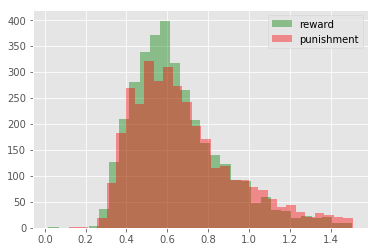

In [155]:
# Look at reaction time distribution for both conditions
subject = list(range(n_subjects))

fig, ax = plt.subplots(facecolor='w')

rt_rew = beh[subject, 0, :, 5].flatten()
rt_pun = beh[subject, 1, :, 5].flatten()

ax.hist(rt_rew, color='g', bins=30, alpha=.4, label='reward')
ax.hist(rt_pun, color='r', bins=30, alpha=.4, label='punishment');
ax.legend()